<a href="https://colab.research.google.com/github/cl676767/Machine-learning-spam-detection/blob/main/Email_spam_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, classification_report

data = pd.read_csv("spam_ham_dataset.csv")
data

#spam is labeled 1, none spam 0

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
#cleaning up data
data.info()
data.drop(columns=['label','Unnamed: 0'],inplace = True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
#make sure dataset is balanced
#number of spam inputs = 1499
#number of no spam = 3672
#therefore inbalanced dataset, will use random oversampler on dataset after it is converted into tf-idf

print(f"Number of spam: {data['label_num'].sum()}")
print(f"NUmber of non-spam: {len(data) - data['label_num'].sum()}")



Number of spam: 1499
NUmber of non-spam: 3672


In [5]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label_num'],test_size=0.2,random_state=0)

In [6]:
#feature extraction using tf-idf
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [7]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf,y_train)

print(y_resampled.shape)
(y_resampled==0).sum()

#half of samples are now spam and half are not


(5880,)


np.int64(2940)

In [8]:
#training a couple or models and comparing the accuracy and precision

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
nb = MultinomialNB()
knc = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

models = {
    'lr':lr,
    'nb':nb,
    'knc':knc,
    'svc':svc,
    'rfc':rfc,
    'gbc':gbc
}


In [9]:
#store the data
accuracies = []
precisions = []
#training all the models
def train_model(model):
  model.fit(X_resampled,y_resampled)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy, precision

for name,model in models.items():
  accuracy, precision = train_model(model)
  print(f"{name} accuracy: {accuracy}")
  print(f"{name} precision: {precision}")
  accuracies.append(accuracy)
  precisions.append(precision)



lr accuracy: 0.9681159420289855
lr precision: 0.9017857142857143
nb accuracy: 0.9710144927536232
nb precision: 0.9333333333333333
knc accuracy: 0.978743961352657
knc precision: 0.976271186440678
svc accuracy: 0.9922705314009662
svc precision: 0.9773462783171522
rfc accuracy: 0.9806763285024155
rfc precision: 0.9492063492063492
gbc accuracy: 0.9507246376811594
gbc precision: 0.8620689655172413


In [10]:
results = pd.DataFrame({
    'Model':models.keys(),
    'Accuracy':accuracies,
    'Precision':precisions
})
results

,Model,Accuracy,Precision
0,lr,0.968116,0.901786
1,nb,0.971014,0.933333
2,knc,0.978744,0.976271
3,svc,0.992271,0.977346
4,rfc,0.980676,0.949206
5,gbc,0.950725,0.862069


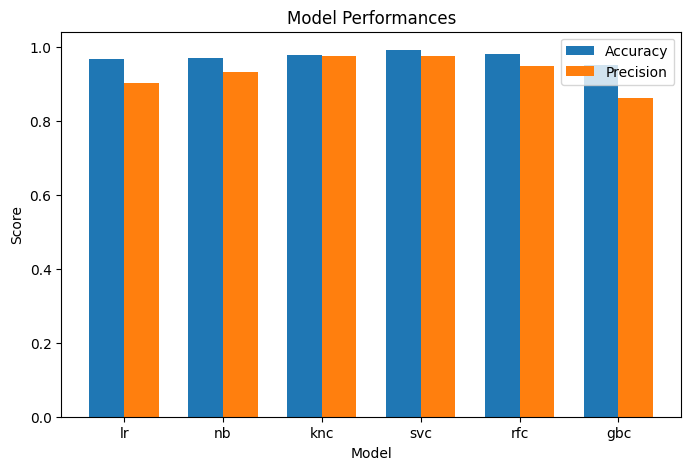

In [11]:
#plotting
plt.figure(figsize=(8,5))
bar_width = 0.35
index = range(len(models))
plt.bar(index,accuracies,bar_width,label='Accuracy')
plt.bar([i+bar_width for i in index],precisions, bar_width,label='Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performances')
plt.xticks([i+bar_width/2 for i in index],models.keys())
plt.legend()



In [12]:
#false positive are costly, therefore precision is more important, however for ours it doesn't really matter cause the ones with higher precision look like they also have highest accuracy
#combining knc svc and rfc models, the ones with highest precision

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('knc',knc),('svc',svc),('rfc',rfc)],voting='hard')
ensemble.fit(X_resampled,y_resampled)
y_pred = ensemble.predict(X_test_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)


In [13]:
print(f"Ensemble accuracy: {accuracy}")
print(f"Ensemble precision: {precision}")

Ensemble accuracy: 0.9922705314009662
Ensemble precision: 0.9742765273311897


In [14]:
#lil bit of my own testing for fun
test_text = ["Thank you for signing up for the guelph road test, make sure to remember the following date: 9:30 September 2024","Congrats!!! You just won a brand new PS5!","Whats good, run up ball today ill buy u a pizza","Good morning, hope you are having an amazing day, just a remind to sign up for the orientation before it is too late!","Morning Mr Li, this is a reminder that your appointement is scheduled for 5pm today"]
test_text_tfidf = vectorizer.transform(test_text)

print(svc.predict(test_text_tfidf))
ensemble.predict(test_text_tfidf)


[0 1 1 0 1]


array([0, 1, 1, 0, 1])

In [15]:
#saving the model
import joblib

joblib.dump(svc,"spam_detection_model.pkl")
joblib.dump(vectorizer,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']